Original FOOD101 data and website
https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

In [ ]:
import torch
from torch import nn
torch.__version__

'2.1.0+cu121'

#How to get your own data in pytorch
for that we use custom dataset
#domain libraries
vision, text, audio, recommendation

In [ ]:
#Set up device agnoistic code
device= "cuda" if torch.cuda.is_available() else "cpu"


#Get the data

#Our data set if subset of Food101 dataset
we have 3 classes and 10% of images

In [ ]:
import requests
import zipfile
from pathlib import Path

In [ ]:
#Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If the image folder doesnt exist, download it and prepare it.
if image_path.is_dir(): #this .is_dir() will check whether the given path is directory or not.
  print(f"{image_path} directory already exist skipping download")
else:
  print(f"{image_path} does not exist, creating one")
  image_path.mkdir(parents= True, exist_ok=True)  #path.mkdir() will create a new directory

# #Download



data/pizza_steak_sushi does not exist, creating one


In [ ]:
#Download pizza, steak, sushi data
with open(data_path/ "pizza_steak_sushi.zip", "wb") as f: #create a zip file in directory and open it for reading or writing purpose

  request =requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")

  print('Downloading pizza, steak, sushi data...')
  f.write(request.content)   #write the content of the link in the zip file at the given directory

#Unzip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping data")
  zip_ref.extractall(image_path)


Unzipping data


#Becoming one with the data

In [ ]:
import os
def walk_through_dir(dir_path):
  """ Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    "walks through dir_path returning its contents "
    print(f"There are {len(dirnames)} directories  and {len(filenames)} images in {dirpath}")


In [ ]:
walk_through_dir(image_path)

There are 2 directories  and 0 images in data/pizza_steak_sushi
There are 3 directories  and 0 images in data/pizza_steak_sushi/test
There are 0 directories  and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories  and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories  and 19 images in data/pizza_steak_sushi/test/steak
There are 3 directories  and 0 images in data/pizza_steak_sushi/train
There are 0 directories  and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories  and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories  and 75 images in data/pizza_steak_sushi/train/steak


In [ ]:
#Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

#Visualizing an image
1. Get all of the image paths
2. Pick a random image path using Pythons random.choice()
3. Get the image class name using pathlib.Path.parent.stem
4. Since we are working with images lets open image with the pythons PIL
5. we will then show the image and print metadata

[PosixPath('data/pizza_steak_sushi/test/pizza/714866.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'), PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg')]
Random image path:data/pizza_steak_sushi/test/steak/673127.jpg
Image class: steak
Image height: 512
Image width: 512


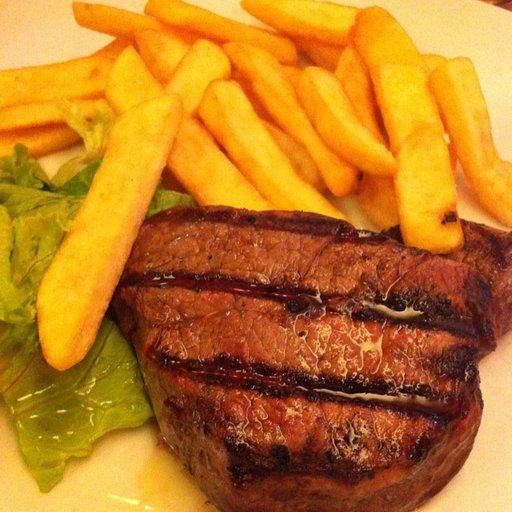

In [ ]:
import random
from PIL import Image

#set the seed
random.seed(42)

#1. get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg")) #.glob(pattern) will select all the images with the given pattern
print(image_path_list[:5])
#2. Pick a radom image path
random_image_path= random.choice(image_path_list)  #select an element from the list randomly

#3. Get the image class from the path name(class name of image is the name of parent directrory where the image is stored)
image_class = random_image_path.parent.stem

#4.Open image
img= Image.open(random_image_path)

#5. Print metadata
print(f"Random image path:{random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Text(0.5, 1.0, 'Image class : steak | image shape (512, 512, 3)-->(h, w ,channel)')

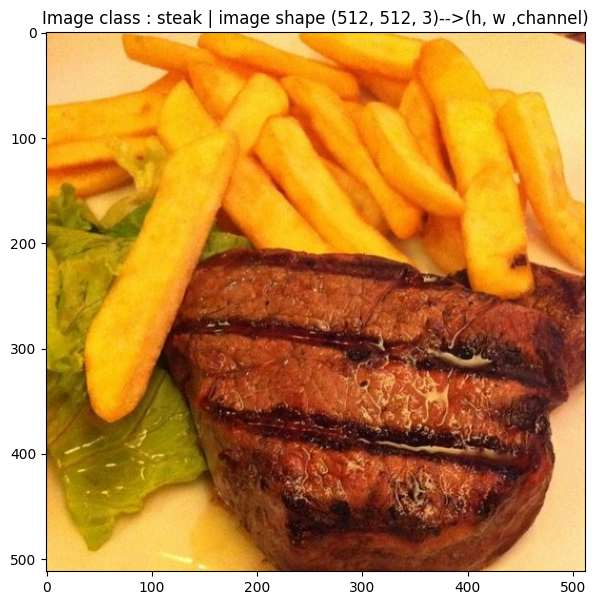

In [ ]:
#Try to visualize using matplotlib
import numpy as np
import matplotlib.pyplot as plt

#turn an image into an array
img_as_array= np.asarray(img)


#plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class : {image_class} | image shape {img_as_array.shape}-->(h, w ,channel)")

#transforming the data
1. Turn target data into tensor
2. Turn it into torch.utils.data.Dataset and subsequentially a torch.uti.data.Dataloader
3.


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

#transforming data with torchvision.transforms

In [ ]:
#write transform for image(use transform.compose() or nn.Sequential())
data_transform = transforms.Compose([

    #resize our image to 64*64
    transforms.Resize((64,64)),

    #Flip the images
    transforms.RandomHorizontalFlip(p=0.5),

    #Turn image into torch.Tensor
    transforms.ToTensor()]
)

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F8BA4095E10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=306x512 at 0x7F8BA4112D10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F8BA3FA1570>


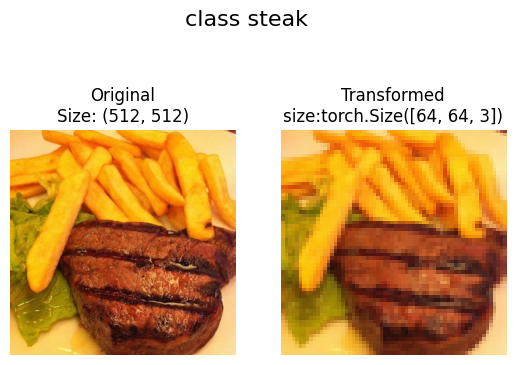

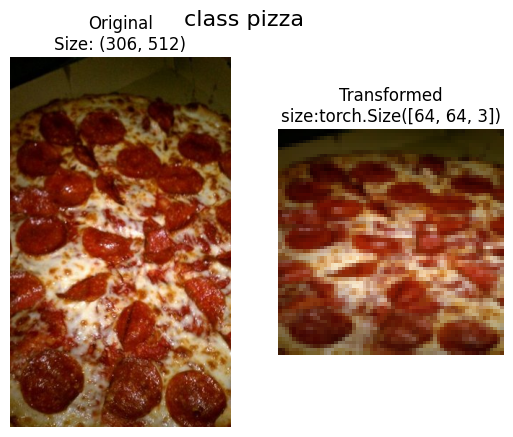

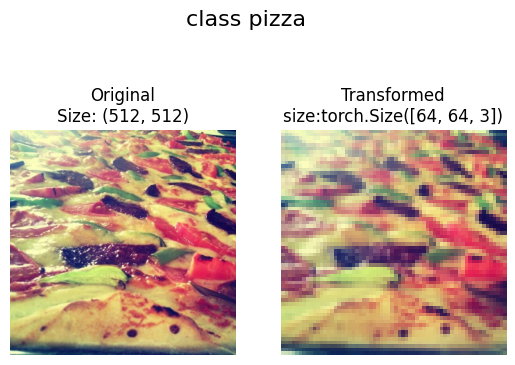

In [ ]:
def plot_transformed_images(image_paths:list, transform, n=3, seed=None):
  """
  selects random images from a path of images and load/transforms them
  & then plots the original vs the transformed version
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      print(f)
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f) #to plot the image
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False) # to not show the axis points


      #Transform and plot target image
      transformed_image= transform(f).permute(1,2,0) #change the shape for matplotlib
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nsize:{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"class {image_path.parent.stem} ", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform= data_transform,
                        n=3,
                        seed=42
                        )




##4. Option 1: Loading image data using ImageFolder
we can load image classification data using torchvision.datasets.ImageFolder

In [ ]:

#Use ImageFolder to create datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root= train_dir,
                                 transform=data_transform, #a transform for the data
                                 target_transform= None) # a transform for the label

test_data = datasets.ImageFolder(root= test_dir,
                                 transform =data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
#Get class names as the list
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
#Check the lengths of our dataset
len(train_data), len(test_data)

(225, 75)

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
#Index on the train_data dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")


Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

original shape: torch.Size([3, 64, 64])
Image permute : torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

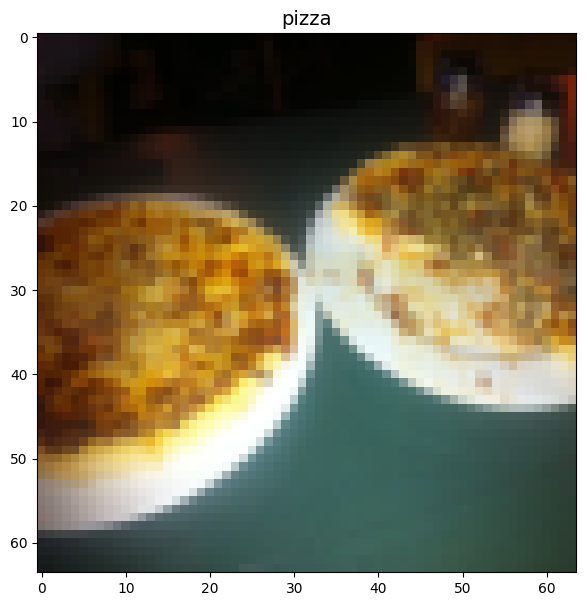

In [ ]:
#Rearrange the order dimensions
img_permute = img.permute(1,2,0)

#print out different shapes
print(f"original shape: {img.shape}")
print(f"Image permute : {img_permute.shape}")

#plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(class_names[label], fontsize=14)

In [ ]:
#turn loaded images into dataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader(dataset = train_data,
                              batch_size= BATCH_SIZE,
                              num_workers=1,
                              shuffle= True)
test_dataloader= DataLoader(dataset= test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=1,
                            shuffle=False
                            )
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8ba3e8c460>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8ba3e8cbe0>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
img,label = next(iter(train_dataloader))
print(f"img shape {img.shape}")
print(f"label shape {label.shape}")

img shape torch.Size([1, 3, 64, 64])
label shape torch.Size([1])



#Creating custom dataset if the torchvision.datasets.ImageFolder() doesn't exists
1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the dataset

* pros:
  1. create dataset out of anything
  2. not limited to prebuild pytorch Dataset Functions

* cons:
  1. even though you could create dataset out of almost anything. it doesnt mean it will num_work
  2. using a custom dataset often results in us writing more code, which would prone to errors or performance issues



In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
#Instance of torchvision.dataset.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# Creating a helper function to get class names
we want functions to:
1. Get the class names os.scandir() to traverse a target directory (ideally the direcotry is in std classification format)
2. raise an error if the class names are not found
3. Turn the class names into a dict and a list and return them.


In [ ]:
#setup path for target directory
target_directory = train_dir
print(f"Target dir is:  {target_directory}")
print(f"{os.scandir(target_directory)}")
#get the class names from the target dir
class_names_found= sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir is:  data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str)-> Tuple[List[str], Dict[str,int]]:
  """ Finds the class folder names in a target directory."""
  #1.Get the class names by scaniing the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2.Raise and error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldnt find any classes in {directory}....Please check file struture")

  #3. Creat a dictionary of index labels(computers prefer numbers rather than strings as labels)
  class_to_idx= {class_name :  i for i, class_name in enumerate(classes) }
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})


#Create a custom dataset to replicate the ImageFolder
To create our own custom dataset we want to:

1. Subclass 'torch.utils.data.Dataset'
2. Init our subclass with a target directory (the directory we'd like to get
from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
  * paths -paths of our images
  * transform -the transform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to load_images() this fun will open an image
5. overwrite the __len()__method to return lenth of dataset
6. overwrite __getitem()__ method to return a given sample when passed an index



In [ ]:
#Write a custom dataset
from torch.utils.data import Dataset

#1.Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

  #2. Initialize our custom dataset
  def __init__(self, targ_dir : str, transform=None)->None:

    #3.Create all class attributes

    #Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    #Setup transforms
    self.transform=transform
    #Create classes and class to idx attrbt
    self.classes, self.class_to_idx = find_classes(targ_dir)

  #4.create a function to load images
  def load_image(self, index:int) -> Image.Image:
    "opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  #5.Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)

  #6. Overwrite getitem() method
  def __getitem__(self, index:int)->Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X,y)."
    img=self.load_image(index)
    class_name =self.paths[index].parent.name #expects path in format: data_folder/class_name/image.jpg
    class_idx= self.class_to_idx[class_name]

    #Trnsform if necessary
    if self.transform:
      return self.transform(img), class_idx #return data, label(X,y)
    else:
      return img, class_idx #return untransformed image and label





In [ ]:
img, label = train_data[0]

In [ ]:
img,label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [ ]:
#Creata a transform
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor()])

test_transforms= transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.ToTensor()
    ])

In [ ]:
#Test out ImageFolderCustom
train_data_custom =ImageFolderCustom(targ_dir= train_dir,
                                     transform=train_transforms)
test_data_custom =ImageFolderCustom(targ_dir= test_dir,
                                    transform= test_transforms)


In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f8ba3d6d8a0>,
 <__main__.ImageFolderCustom at 0x7f8ba3d6d6f0>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
len(test_data), len(test_data_custom)

(75, 75)

In [ ]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
#Check for equality between original ImageFolderDataset and ImageFolderCustomDataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)


True
True


#create a function to display random images

1.Take in a dataset and number of other parameters such as class names and how many images (n) to visualize
2. to prevent display getting out of hand lets cap the no images to see at 10(n=10)
3. set random seed
4. Get a list of random sample indexes from the target dataset
5. Setup a matplot lib plot
6. loop throught the random sample images
7. Make sure that dimn of our imgs line up with matplotlib


In [ ]:
#Create a fun to take dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n:int=10,
                          display_shape:bool=True,
                          seed:int=None):
  #2. Adjust display if n is too high
  if n>10:
    n=10
    display_shape=False
    print(f"for display n shouldnt be larger than 10 setting to 10 and removing shape display")

  #3. seed
  if seed:
    random.seed(seed)
  #4.get random sample indexes
  random_samples_idx=random.sample(range(len(dataset)), k=n)

  #5.Setup the plot
  plt.figure(figsize=(16,9))

  #6.loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_img, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

   #7.Adjust tensor dimensin for plotting
    targ_image_adjust = targ_img.permute(1,2,0)

   #Plot adjusted samples
    plt.subplot(1,n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title= f"Class:{classes[targ_label]}"
      if display_shape:
        titile= title+f"\nshape:{targ_image_adjust.shape}"
    plt.title(title)





In [ ]:
me=random.sample(range(len(train_data_custom)), k=10)
me

[62, 57, 35, 188, 26, 173, 189, 139, 22, 151]

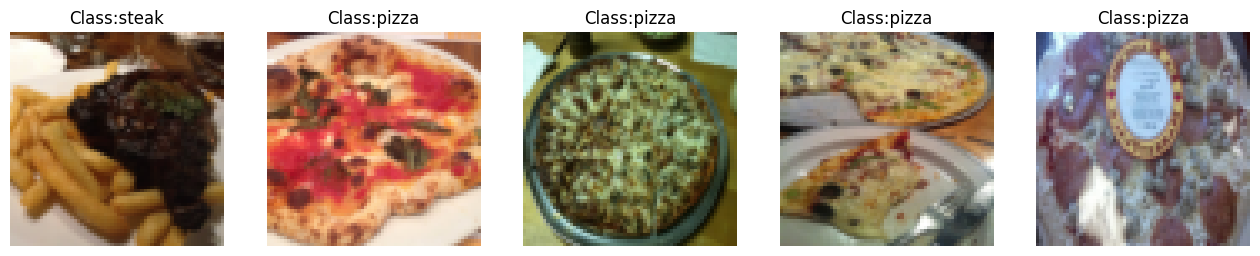

In [ ]:
#Display rando imgages from the ImageFolder created dataset
display_random_images(train_data, n=5, classes=class_names, seed=None)

for display n shouldnt be larger than 10 setting to 10 and removing shape display


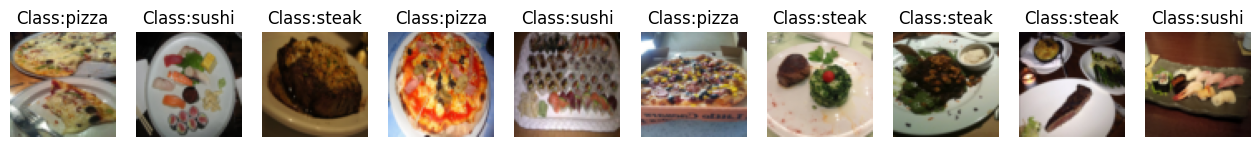

In [ ]:
#Display random images from the ImageFolderCustom Dataset
display_random_images(train_data_custom, n=20, classes= class_names, seed=None)

### 5.4 Turn custom loaded images into DataLoader'S

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS=os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
test_dataloader_custom= DataLoader(dataset=test_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f8ba3ec0f40>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8ba3ec0160>)

In [ ]:
#Get image and label from custom Dataloader
img_custom, label_custom= next(iter(train_dataloader_custom))

#print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other forms of transforms (data_augumentation)
Data augumentation is the process of artificially adding diversity to our training data.
In the case of image data, this may mean applying various transformations to the training images.


Lets take a look at one particular type of data augumentation used to train pytorch vision model to the state of art levels.
blog post:https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#trivialaugment

In [ ]:
#lets look at trivial augument
from torchvision import transforms
train_transform= transforms.Compose([transforms.Resize(size=(224,224)),
                                    transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                    transforms.ToTensor()])
test_transforms= transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                     transforms.ToTensor()])

In [ ]:
#Get all image paths
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/714866.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/416067.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/971934.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/648055.jpg')]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x384 at 0x7F8BBFD11A20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512 at 0x7F8BA4097B20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x287 at 0x7F8BA3E17C40>


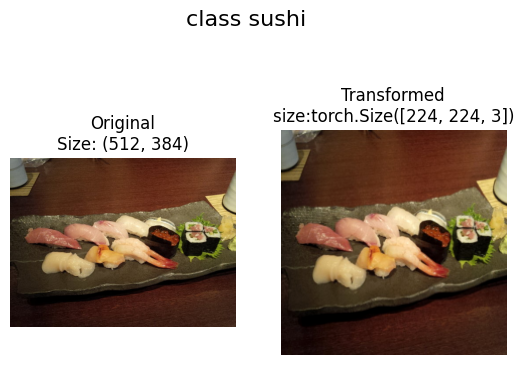

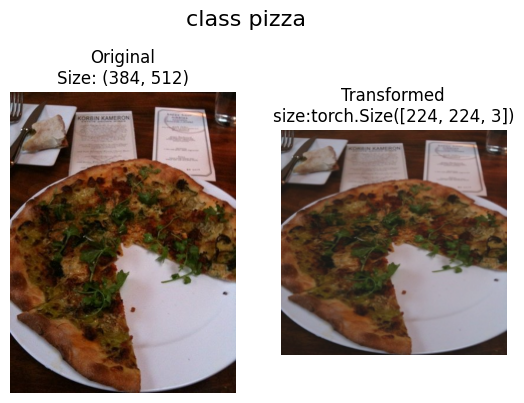

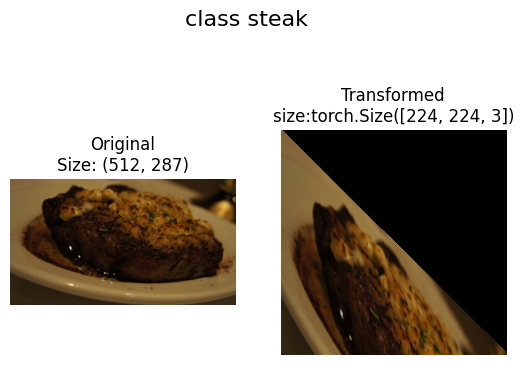

In [ ]:
#plot randomized transformed images
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transform,
                        n=3,
                        seed=None)

## 7. Model : TinyVGG without data augumentation
lets replicate the TinyVGG architecture from the CNN expainer website

### 7.1 Creating the transforms and loading the data for model 0

In [ ]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [ ]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7f8ba3a9aef0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8ba3a9a620>)

### 7.2 Create TinyVGG model class

In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image (to test the mod

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0578, 0.0634, 0.0351]])

Output prediction probabilities:
tensor([[0.3352, 0.3371, 0.3277]])

Output prediction label:
tensor([1])

Actual label:
2


### 7.4 Use torchinfo to get an idea of the shapes going through our model

In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### 7.5 Create train & test loop functions

let's make some training and test loop functions to train our model on the training data and evaluate our model on the testing data.

And to make sure we can use these the training and testing loops again, we'll functionize them.

Specifically, we're going to make three functions:

* train_step() - takes in a model, a DataLoader, a loss function and an optimizer and trains the model on the DataLoader.
* test_step() - takes in a model, a DataLoader and a loss function and evaluates the model on the DataLoader.
* train() - performs 1. and 2. together for a given number of epochs and returns a results dictionary.

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 Creating a train() function to combine train_step() and test_step()

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

###  7.7 Train and Evaluate Model 0

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1343 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.1434 | test_acc: 0.1979
Total training time: 11.338 seconds


### 7.8 Plot the loss curves of Model 0

In [ ]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

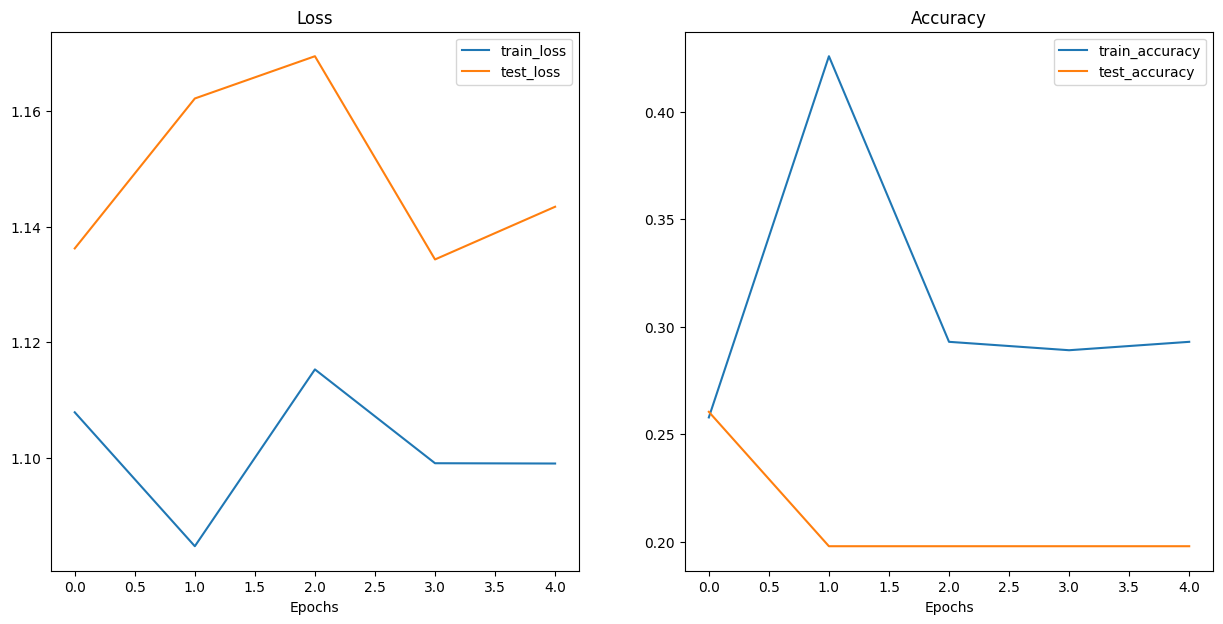

In [ ]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?
loss curves can be found here https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic


## 9. Model 1: TinyVGG with Data Augmentation

### 9.1 Create transform with data augmentation

In [ ]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

### 9.2 Create train and test Dataset's and DataLoader's

In [ ]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8bbfd12e60>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8ba3e8cbe0>)

### 9.3 Construct and train Model 1

In [ ]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 1.1387 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.1696 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1292 | train_acc: 0.3047 | test_loss: 1.1625 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0899 | train_acc: 0.4258 | test_loss: 1.1482 | test_acc: 0.2604
Total training time: 11.433 seconds


### 9.4 Plot the loss curves of Model 1

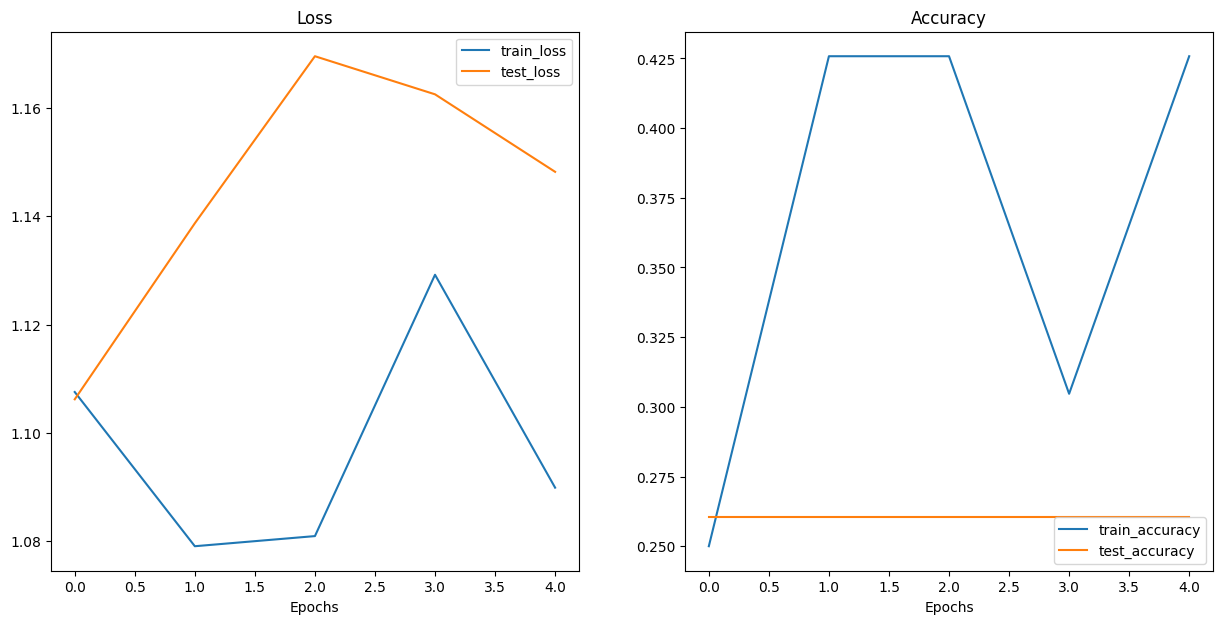

In [ ]:
plot_loss_curves(model_1_results)

## 10. Compare model results

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.107836   0.257812   1.136208  0.260417
1    1.084645   0.425781   1.162171  0.197917
2    1.115261   0.292969   1.169489  0.197917
3    1.099015   0.289062   1.134302  0.197917
4    1.098965   0.292969   1.143424  0.197917

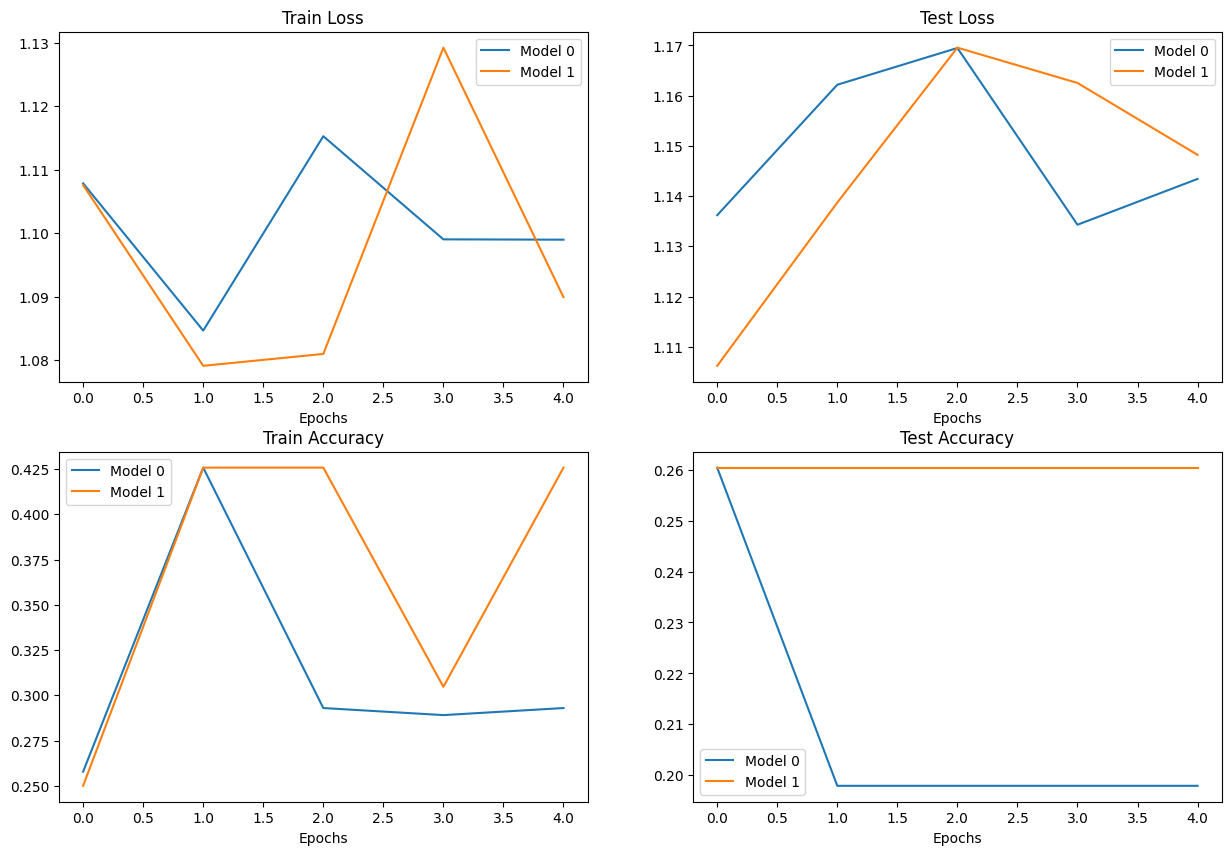

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## 11. Make a prediction on a custom image

Although we have trained a model on a custom data how would we make prediction on a sample which is neither in training data nor in testing data set.

In [ ]:
# Download custom image
import requests

#Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

#download the image if it doesnt exist already
if not custom_image_path.is_file():
 with open(custom_image_path, "wb") as f:
   #when downloading from GitHub need to use the "raw" file link
   request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
   print(f"Downloading {custom_image_path}...")
   f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download")

### 11.1 Loading in a custom image with PyTorch
we have to make sure that our customimage is in the same format as the data our model was trained on.

* Intensor form with datatype (torch.float32)
* of shape 64x64x3
* on the right device

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8= torchvision.io.read_image(str(custom_image_path))
print(f"custom image tensor: \n {custom_image_uint8}")
print(f"custom image shape: {custom_image_uint8.shape}")
print(f"custm image datatype {custom_image_uint8.dtype}")

custom image tensor: 
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
custom image shape: torch.Size([3, 4032, 3024])
custm image data

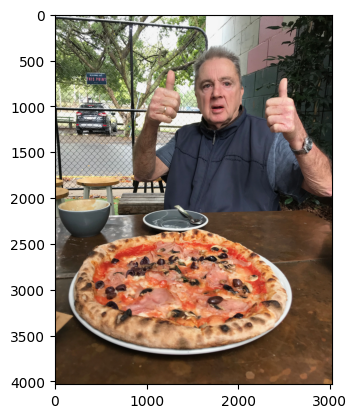

In [ ]:
plt.imshow(custom_image_uint8.permute(1,2,0))

### 11.2 Predicting on custom images with a trained PyTorch model

In [ ]:
# Try to make a prediction on image in uint8 format (this will error)
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device, dtype=torch.float))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x762048 and 2560x3)

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

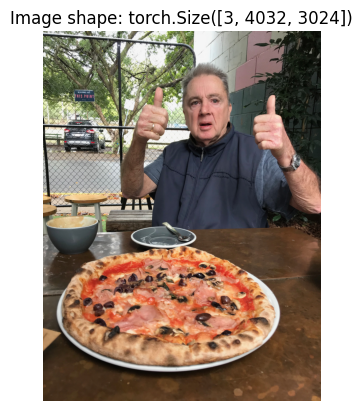

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


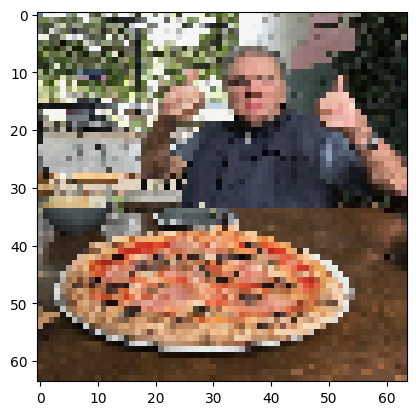

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0))

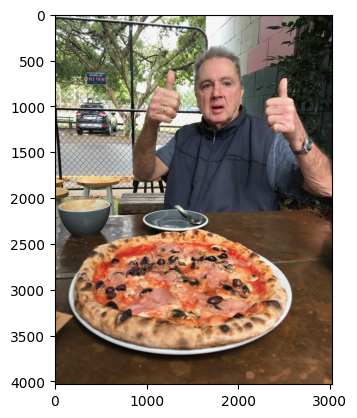

In [ ]:
plt.imshow(custom_image.permute(1, 2, 0))

In [ ]:
#This will error image not on the right device
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

In [ ]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [ ]:
custom_image_pred

tensor([[ 0.1158,  0.0334, -0.1418]])

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.1158,  0.0334, -0.1418]])
Prediction probabilities: tensor([[0.3712, 0.3419, 0.2869]])
Prediction label: tensor([0])


In [ ]:
class_names[custom_image_pred_label]

'pizza'

### 11.3 Putting custom image prediction together: building a function
So let's put them all together in a function we can easily use over and over again.

Specifically, let's make a function that:

* Takes in a target image path and converts to the right datatype for our model (torch.float32).
* Makes sure the target image pixel values are in the range [0, 1].
* Transforms the target image if necessary.
* Makes sure the model is on the target device.
* Makes a prediction on the target image with a trained model (ensuring the image is the right size and on the same device as the model).
* Converts the model's output logits to prediction probabilities.
* Converts the prediction probabilities to prediction labels.
* Plots the target image alongside the model prediction and prediction probability.

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

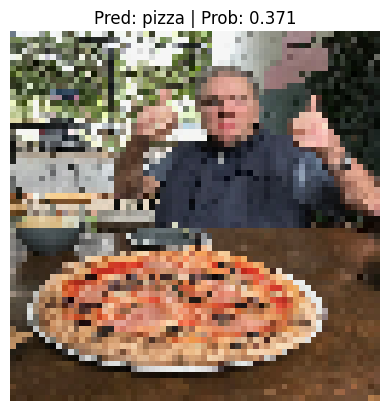

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)